In [224]:
# uso das library's Pandas e Numpy
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt


In [ ]:
#Atribuição ao daframe
 microdados_enem_2016 = pd.read_csv('Microdados_Enem_2016.csv')
microdados_enem_2016['TP_REGIAO'] = None 
print(microdados_enem_2016)

In [267]:
#código das regiões com fonte de dados do IBGE
#https://atendimento.tecnospeed.com.br/hc/pt-br/articles/360021494734-Tabela-de-C%C3%B3digo-de-UF-do-IBGE

for index, row in microdados_enem_2016.iterrows():
    
    if str(row['CO_MUNICIPIO_RESIDENCIA'])[0] == str(1):
        microdados_enem_2016.loc[index, 'TP_REGIAO'] = 'Norte'
    
    if str(row['CO_MUNICIPIO_RESIDENCIA'])[0] == str(2):
        microdados_enem_2016.loc[index, 'TP_REGIAO'] = 'Nordeste'
    
    if str(row['CO_MUNICIPIO_RESIDENCIA'])[0] == str(3):
        microdados_enem_2016.loc[index, 'TP_REGIAO'] = 'Sudeste'
        
    if str(row['CO_MUNICIPIO_RESIDENCIA'])[0] == str(4):
        microdados_enem_2016.loc[index, 'TP_REGIAO'] = 'Sul'
        
    if str(row['CO_MUNICIPIO_RESIDENCIA'])[0] == str(5):
        microdados_enem_2016.loc[index, 'TP_REGIAO'] = 'Centro-Oeste'
        
    

In [248]:
#código das regiões com fonte de dados do IBGE
#https://atendimento.tecnospeed.com.br/hc/pt-br/articles/360021494734-Tabela-de-C%C3%B3digo-de-UF-do-IBGE
df_media_idade = microdados_enem_2016.groupby(['TP_REGIAO','TP_SEXO'],as_index=False)['NU_IDADE'].mean()



### Média da idade que concorreu ao Enem por Região

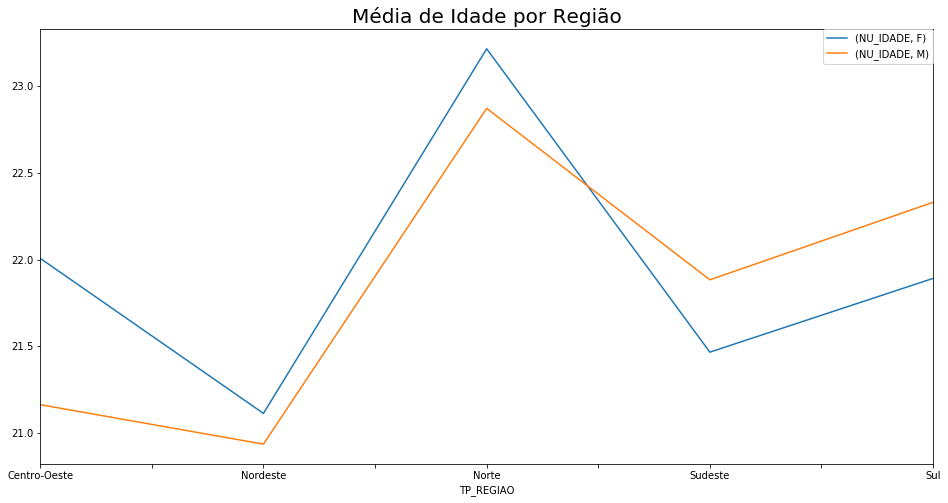

In [317]:
#Média das idades por região que concerreram ao enem
#Filtes do panda
#Bibliotecas matplotlib

avg_idade_regiao = microdados_enem_2016.filter(items=['TP_REGIAO','TP_SEXO','NU_IDADE']).groupby(['TP_REGIAO','TP_SEXO']).mean().sort_values(by='NU_IDADE',ascending=False).unstack().plot(figsize=(16,8))      
avg_idade_regiao.set_title('Média de Idade por Região', fontsize=20) 
avg_idade_regiao.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)
plt.show()

### Laudo: Pessoas prestam exame mais tarde na região Norte e mais cedo no Nordeste


### Pessoas onde a família não possui nenhuma renda

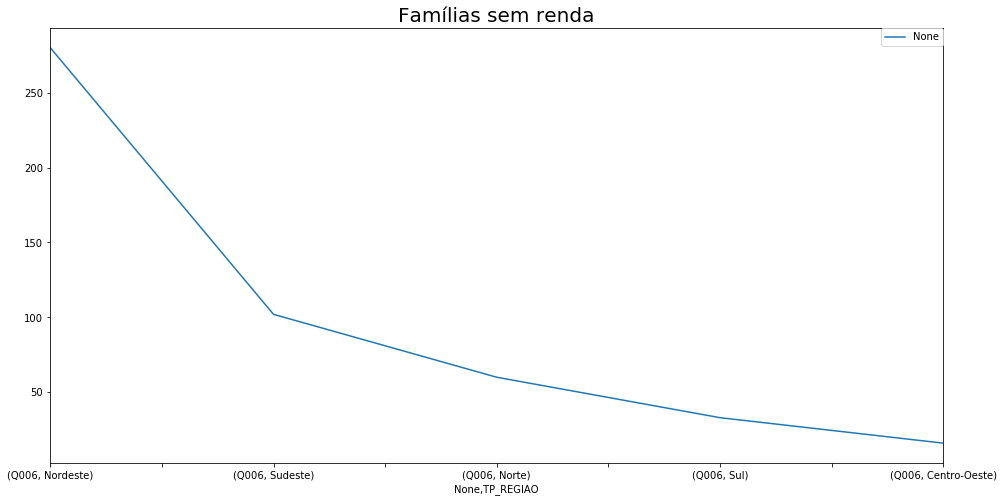

In [316]:
sem_renda = microdados_enem_2016.filter(items=['Q006','TP_REGIAO']).where(microdados_enem_2016.Q006 == 'A').groupby(['TP_REGIAO']).count().sort_values(by='Q006',ascending=False).unstack().plot(figsize=(16,8))      
sem_renda.set_title('Famílias sem renda', fontsize=20) 
sem_renda.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)
plt.show()

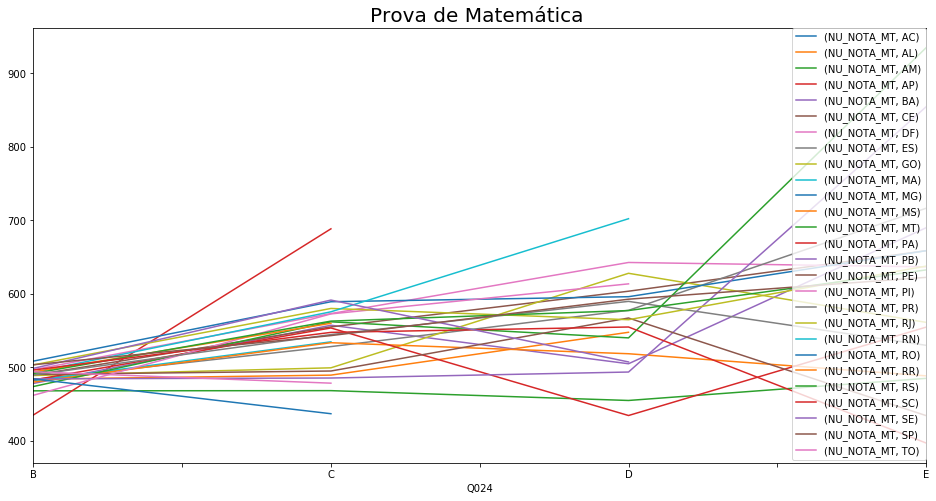

In [289]:
plt.show()

# Laudo:
### A região nordeste é a mais afetada , com relação a famílias sem renda. O que justica maior investimento na região 


### Notas dos Alunos de Matémática diferentes   de que  "Abandonei e foi reprovado" por estado


In [314]:
nota_mat_estado = microdados_enem_2016.filter(items=['SG_UF_RESIDENCIA','Q050','NU_NOTA_MT']).where(microdados_enem_2016.Q050 != 'D').groupby(['Q050','SG_UF_RESIDENCIA']).mean().sort_values(by='NU_NOTA_MT',ascending=False).unstack().plot(figsize=(16,8))         
nota_mat_estado.set_title('Nota de matemática por região ', fontsize=20) 
nota_mat_estado.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)

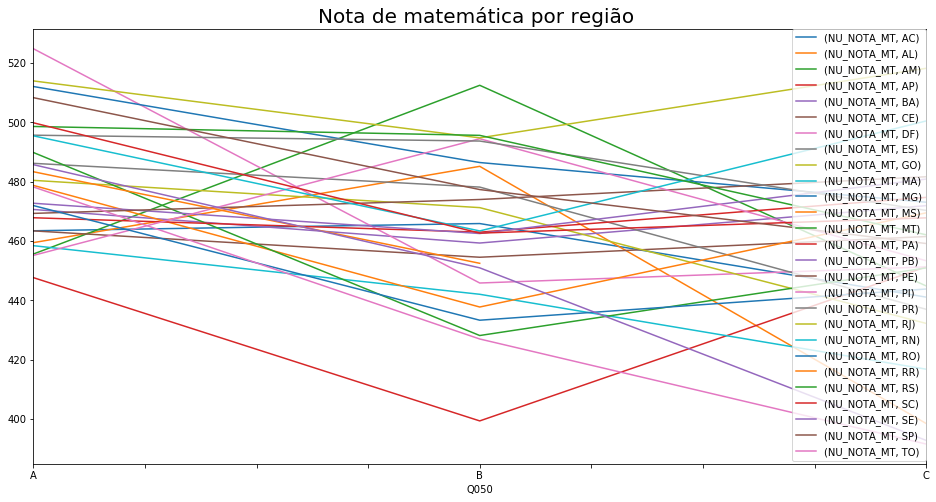

In [315]:
plt.show()